## Using Data Analytics to Manage a Solar Power Plant
<font size='+1'> 
In this analysis, we will be examining 34 days of power generation and sensor reading data from a solar power plant in India with the following goals:  
    
1.  Predict the power generation for the nex few days 
2.  Identify the need for panel cleaning/maintenance
3.  Identify faulty or suboptimal equipment performance

We will be using data analytics skills and python to perform this analysis with the following workflow: 

* Conducting Exploratoy Data Analysis (EDA) to gain insights into the data. This will involve :  
   * Describing the data
   * Visualizing the data
   * Exploring correlations between numerical features
* Performing feature engineering and data wrangling to prepare the data for modeling. 
    
Our goal is to demonstrate how data analysis tools can be used to gain a better understanding of the power generation patterns in a solar power plant and to identify ways to improve  performance. 
    </font>


Data source: 

* /kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
* /kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
gen1=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv')
gen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
gen1.groupby('DATE_TIME').count().head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
01-06-2020 00:00,22,22,22,22,22,22
01-06-2020 00:15,22,22,22,22,22,22
01-06-2020 00:30,22,22,22,22,22,22
01-06-2020 00:45,22,22,22,22,22,22
01-06-2020 01:00,22,22,22,22,22,22


In [4]:
gen1.info(), gen1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


(None,
 DATE_TIME      0
 PLANT_ID       0
 SOURCE_KEY     0
 DC_POWER       0
 AC_POWER       0
 DAILY_YIELD    0
 TOTAL_YIELD    0
 dtype: int64)

In [5]:
sen1=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
sen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
sen1.info(), sen1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


(None,
 DATE_TIME              0
 PLANT_ID               0
 SOURCE_KEY             0
 AMBIENT_TEMPERATURE    0
 MODULE_TEMPERATURE     0
 IRRADIATION            0
 dtype: int64)

<font size='+1'>  Upon examining the first few lines of the 'gen1' dataset, it appears that there are duplicates in the DATE_TIME column. By grouping the dataset by the DATE_TIME columns and counting the number of occurrences, we can see that data has been recorded every 15 minutes and there are 22 data points in each 15-minute interval. The DATE_TIME column type is currently listed as 'object' so the next step is to convert it to 'datetime' format. 
    
    
## Reading DATE_TIME as an INDEX or as a COLUMN
<font size='+1'> 
Reading the datetime as the index while reading a CSV file can sometimes cause issues with the exported datetime index (example below: reading CSV file into 'gen1a'). To avoid these issues, there are two strategies you can use:

  1. Define the datetime format as reading the CSV file and assign the datetime to the index useing 'date_parser' parameter. This approach can be seen in reading CSV file into the 'gen1b' dataframe in the code example below. Functions like 'resample()', slicing based on the index, and filtering such as 'df.index.day' are available to work with the datetime index. 

    
  2. Read the CSV files without defining the datetime index, and then in a subsequent step, define formatting of the datetime column. This approach can be seen in reading CSV file into the 'gen1c' dataframe in the code example below. Functions like '.dt.day' are available to work with the datetime column. 

We proceed with the first stratey.  </font>

Text(0.5, 1.0, 'gen1c month')

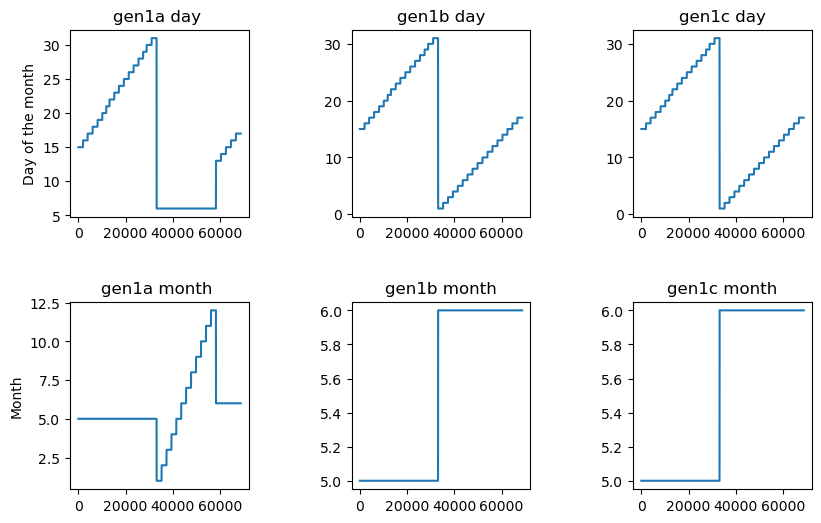

In [7]:
####### reading datetime as an index ####### 
gen1a=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'])

####### reading datetime as an index with a defined format ####### 
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M') 
gen1b=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)

####### reading datetime as a column ###### 
gen1c=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv')
gen1c.DATE_TIME=pd.to_datetime(gen1c.DATE_TIME,format='%d-%m-%Y %H:%M')


f,ax=plt.subplots(2,3, figsize=(9,6))
plt.tight_layout(pad=4)

ax[0,0].plot(gen1a.index.day) #- gen1a.index.day)
ax[0,0].set_title('gen1a day ')
ax[0,0].set_ylabel('Day of the month')

ax[0,1].plot(gen1b.index.day) #- gen1a.index.day)
ax[0,1].set_title('gen1b day')

ax[0,2].plot(gen1c.DATE_TIME.dt.day) #- gen1a.index.day)
ax[0,2].set_title('gen1c day')

ax[1,0].plot(gen1a.index.month) #- gen1a.index.day)
ax[1,0].set_title('gen1a month ')
ax[1,0].set_ylabel('Month')

ax[1,1].plot(gen1b.index.month) #- gen1a.index.day)
ax[1,1].set_title('gen1b month')

ax[1,2].plot(gen1c.DATE_TIME.dt.month) #- gen1a.index.day)
ax[1,2].set_title('gen1c month')


In [8]:
gen1=gen1b.resample('15min').sum() # same as : gen1a.groupby('DATE_TIME').sum()
gen1['time']=gen1.index.time

In [9]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') 
sen1=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)
sen1.drop(['PLANT_ID','SOURCE_KEY'],axis=1, inplace=True)

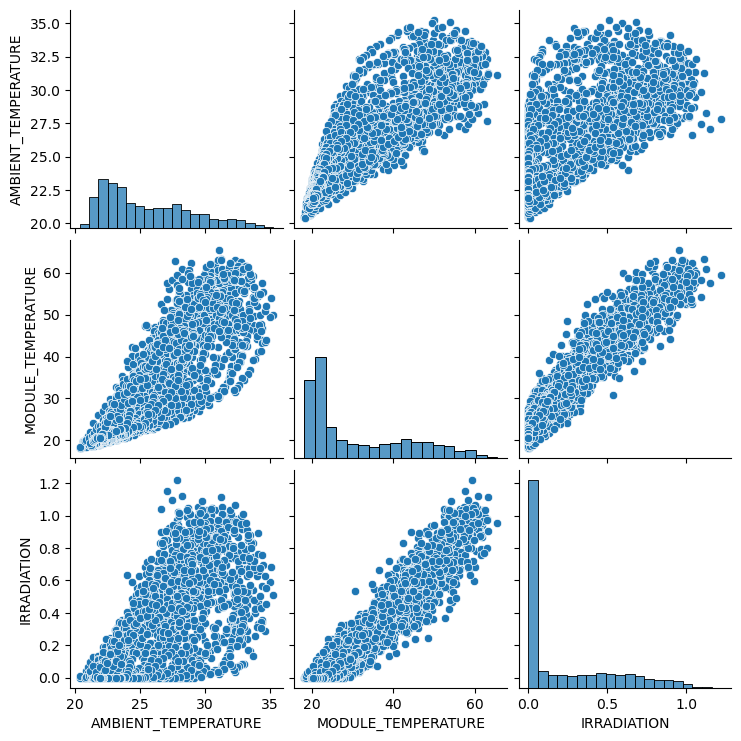

In [10]:
sns.pairplot(sen1)

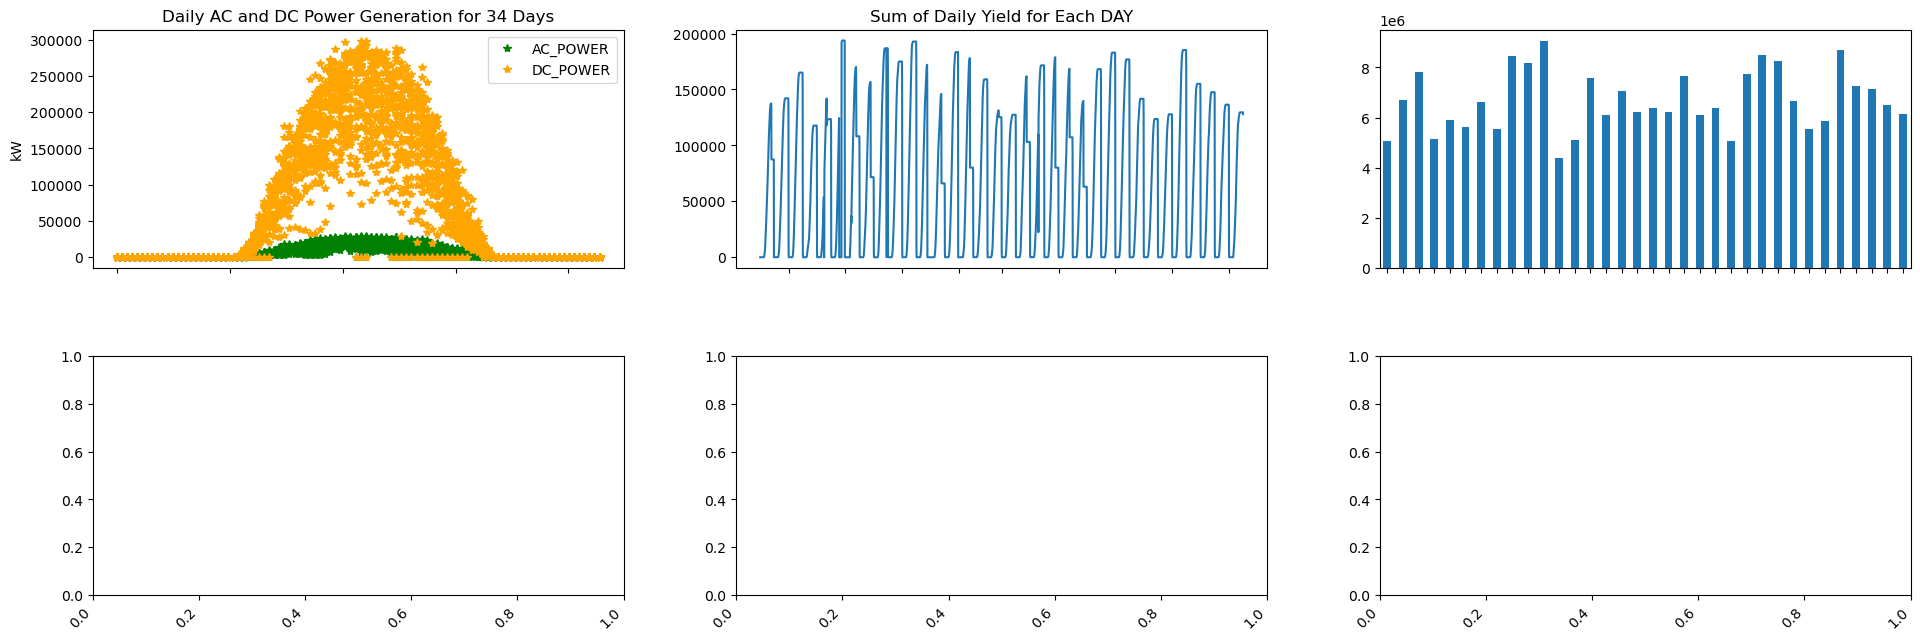

In [11]:
f,ax=plt.subplots(2,3, figsize=(20,8))
plt.tight_layout(pad=5)
ax[0,1].plot(gen1.DAILY_YIELD)
gen1.resample('D').sum().DAILY_YIELD.plot(kind='bar', ax=ax[0,2])

#sns.scatterplot(data=gen1, x='time',y=gen1.DC_POWER*0.001 ,color='orange', ax=ax[0])
gen1.plot(x='time',y='AC_POWER', style='*',color='green',ax=ax[0,0])
gen1.plot(x='time',y='DC_POWER', style='*',color='orange', ax=ax[0,0])

#ax[2].plot(gen1.index.strftime('%H:%M'),gen1.AC_POWER*0.001,'o',color='green')
#ax[2].plot(gen1.index.strftime('%H:%M'),gen1.DC_POWER*0.001,'o',color='orange')

ax[0,0].set_title('Daily AC and DC Power Generation for 34 Days')
ax[0,1].set_title('Daily Yield')
ax[0,1].set_title('Sum of Daily Yield for Each DAY')

ax[0,0].set_ylabel('kW')
f.autofmt_xdate(rotation=45)


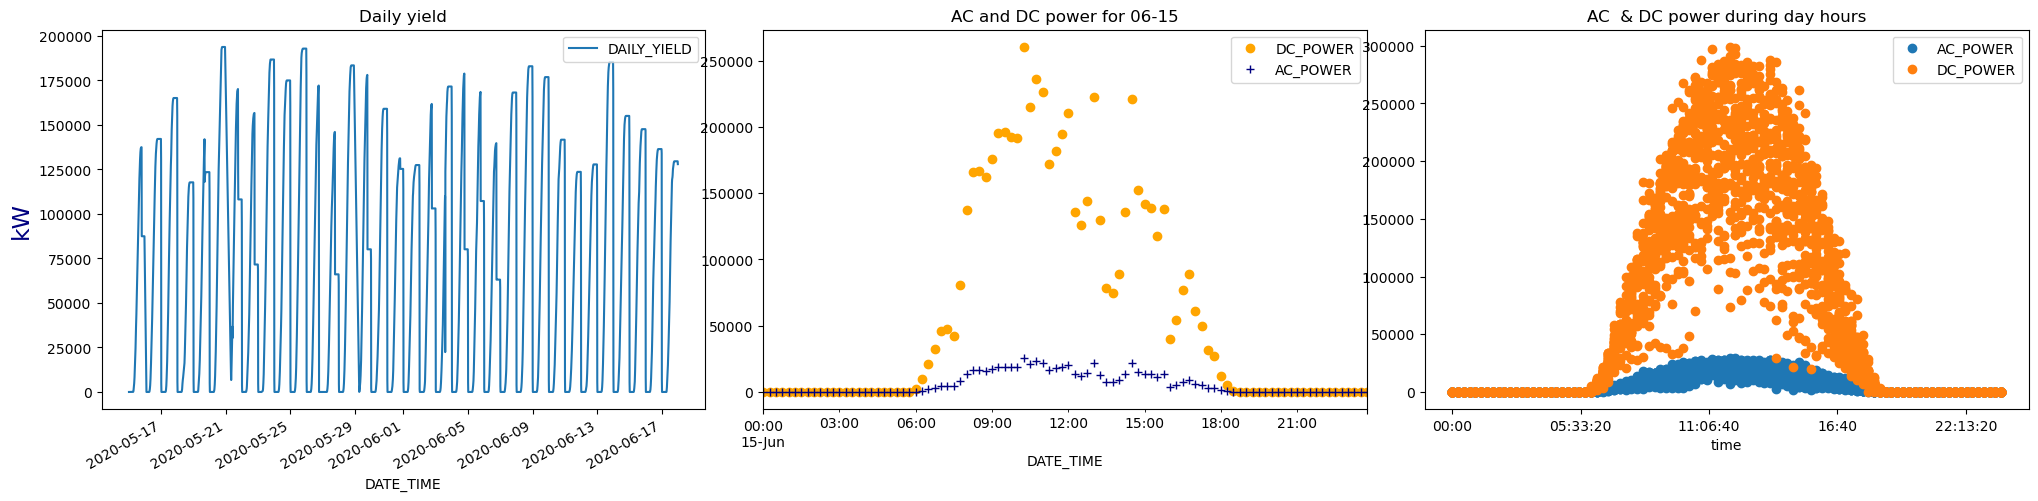

In [12]:
gen1=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv')
gen1.DATE_TIME=pd.to_datetime(gen1.DATE_TIME,format='%d-%m-%Y %H:%M')
gen11=gen1.groupby('DATE_TIME').sum().reset_index()

f,ax=plt.subplots(1,3,dpi=100,figsize=(20,5))
plt.tight_layout()
gen11.plot(x='DATE_TIME',y='DAILY_YIELD',ax=ax[0])
gen11[(gen11.DATE_TIME.dt.day==15) &(gen11.DATE_TIME.dt.month==6)].plot(x='DATE_TIME',y='DC_POWER',color='orange',style='o',ax=ax[1])
gen11[(gen11.DATE_TIME.dt.day==15) &(gen11.DATE_TIME.dt.month==6)].plot(x='DATE_TIME',y='AC_POWER',color='navy',style='+',ax=ax[1])

import datetime as dt 
gen11['time']=gen11.DATE_TIME.dt.time
gen11.set_index('time')[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[2])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC and DC power for 06-15')
ax[2].set_title('AC  & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

In [13]:
gen1a.resample('15min').sum()  # same as : gen1a.groupby('DATE_TIME').sum()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
2020-01-06 00:00:00,90970022,0.0,0.0,5407.250000,153519480.0
2020-01-06 00:15:00,90970022,0.0,0.0,0.000000,153519480.0
2020-01-06 00:30:00,90970022,0.0,0.0,0.000000,153519480.0
2020-01-06 00:45:00,90970022,0.0,0.0,0.000000,153519480.0
2020-01-06 01:00:00,90970022,0.0,0.0,0.000000,153519480.0
...,...,...,...,...,...
2020-12-06 22:45:00,90970022,0.0,0.0,127815.000000,155388778.0
2020-12-06 23:00:00,90970022,0.0,0.0,127815.000000,155388778.0
2020-12-06 23:15:00,90970022,0.0,0.0,127815.000000,155388778.0
